# Inception V4

Inception V4와 Inception-ResNet은 같은 논문을 통해 발표되었다. 이론적인 배경을 두었다기 보다는 Inception의 철학 위에서 많은 실험을 통해 얻은, 더나은 성능을 가진 모델의 구조를 발표했다. 

### Inception module

Inception V4에서는 먼저 stem layer라고 했던 가장 첫번째 Convolution layer를 다음 그림과 같이 바꾸었다. 

<img src="https://datascienceschool.net/upfiles/e387a9dbcf504cf48fa218bf60dd7543.png"  style="width: 100%;">

그림 20.4.9 : Stem layer 

그리고 세 종류의 Inception 모듈을 사용했는데, 각각을 Inception module A, B, C 라고 하겠다. 

<img src="https://datascienceschool.net/upfiles/acf4293e3bcf49ad82f5e902a94e7975.png"  style="width: 100%;">

그림 20.4.10 : Inception module A

<img src="https://datascienceschool.net/upfiles/3385a42716624ef7afe91a77d5ce55f2.png"  style="width: 100%;">

그림 20.4.11 : Inception module B

<img src="https://datascienceschool.net/upfiles/ce68cdf8d25745b0a6225c342368a67c.png"  style="width: 100%;">

그림 20.4.12 : Inception module C

그리고 이미지, 피쳐맵의 크기를 줄이는 레이어를 두가지 종류의 모듈로 구현하여 사용하였다. 이는 Reduction A, B라고 하겠다. 

<img src="https://datascienceschool.net/upfiles/9139bf8610cd4082a87997f0209bd166.png"  style="width: 100%;">

그림 20.4.13 : Reduction A(왼쪽), Reduction B(오른쪽)

#### Inception V4의 구조

#### Inception V4
|  유형  |입력 크기 | 출력 크기 |횟수|
|:--|:------:|:-------:|:-------:|:-------:|
|**입력**|(299,299,3)| |||
|**Stem layer**|(299,299,3)|(35,35,384)|||
|**Inception-A**|(35,35,384)|(35,35,384)|$\times 4$||
|**Reduction-A**|(35,35,384)|(17,17,1024)|||
|**Inception-B**|(17,17,1024)|(17,17,1024)|$\times 7$||
|**Reduction-B**|(17,17,1024)|(8,8,1536)|||
|**Inception-C**|(8,8,1536)|(8,8,1536)|$\times 3$||
|**Average pool**|(8,8,1536)|(1,1,1536)|||
|**FCN**|(1,1,1536)|(1,1,1000)|||
|**softmax**|(1,1,1000)|(1,1,1000)|||

표 18.4.6 : Inception V4 구조

# Inception - ResNet 

Inception에 ResNet의 Skip connection을 더한 것이다. 다음과 같이 Skip connection을 고려한  Inception module을 사용하여 모델을 구성한다. 

<img src="https://datascienceschool.net/upfiles/efbe1e8768c6434a9cb177499c35c9ae.png"  style="width: 100%;">

그림 20.4.14 : Inception ResNet의 Inception module (왼쪽 부터 A, B, C)

<img src="https://datascienceschool.net/upfiles/17c289d731f6487f92786a137ad81e77.png"  style="width: 100%;">

그림 20.4.15 : Inception ResNet 의 Reduction module (왼쪽 부터 A, B)

#### Inception-ResNet의 구조

#### Inception-ResNet 

|  유형  |입력 크기 | 출력 크기 |횟수|
|:--|:------:|:-------:|:-------:|:-------:|
|**입력**|(299,299,3)| |||
|**Stem layer**|(299,299,3)|(35,35,256)|||
|**Inception-A**|(35,35,256)|(35,35,256)|$\times 5$||
|**Reduction-A**|(35,35,256)|(17,17,896)|||
|**Inception-B**|(17,17,896)|(17,17,896)|$\times 10$||
|**Reduction-B**|(17,17,896)|(8,8,1792)|||
|**Inception-C**|(8,8,1792)|(8,8,1792)|$\times 5$||
|**Average pool**|(8,8,1792)|(1,1,1792)|||
|**FCN**|(1,1,1792)|(1,1,1000)|||
|**softmax**|(1,1,1000)|(1,1,1000)|||

표 18.4.6 : Inception ResNet 구조

In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions

incep_resv2 = InceptionResNetV2(input_shape=(299,299,3))
# incep_resv2.summary()

Using TensorFlow backend.


테스트 시 소요 시간 : 3.380155086517334
comic_book (100.00%)


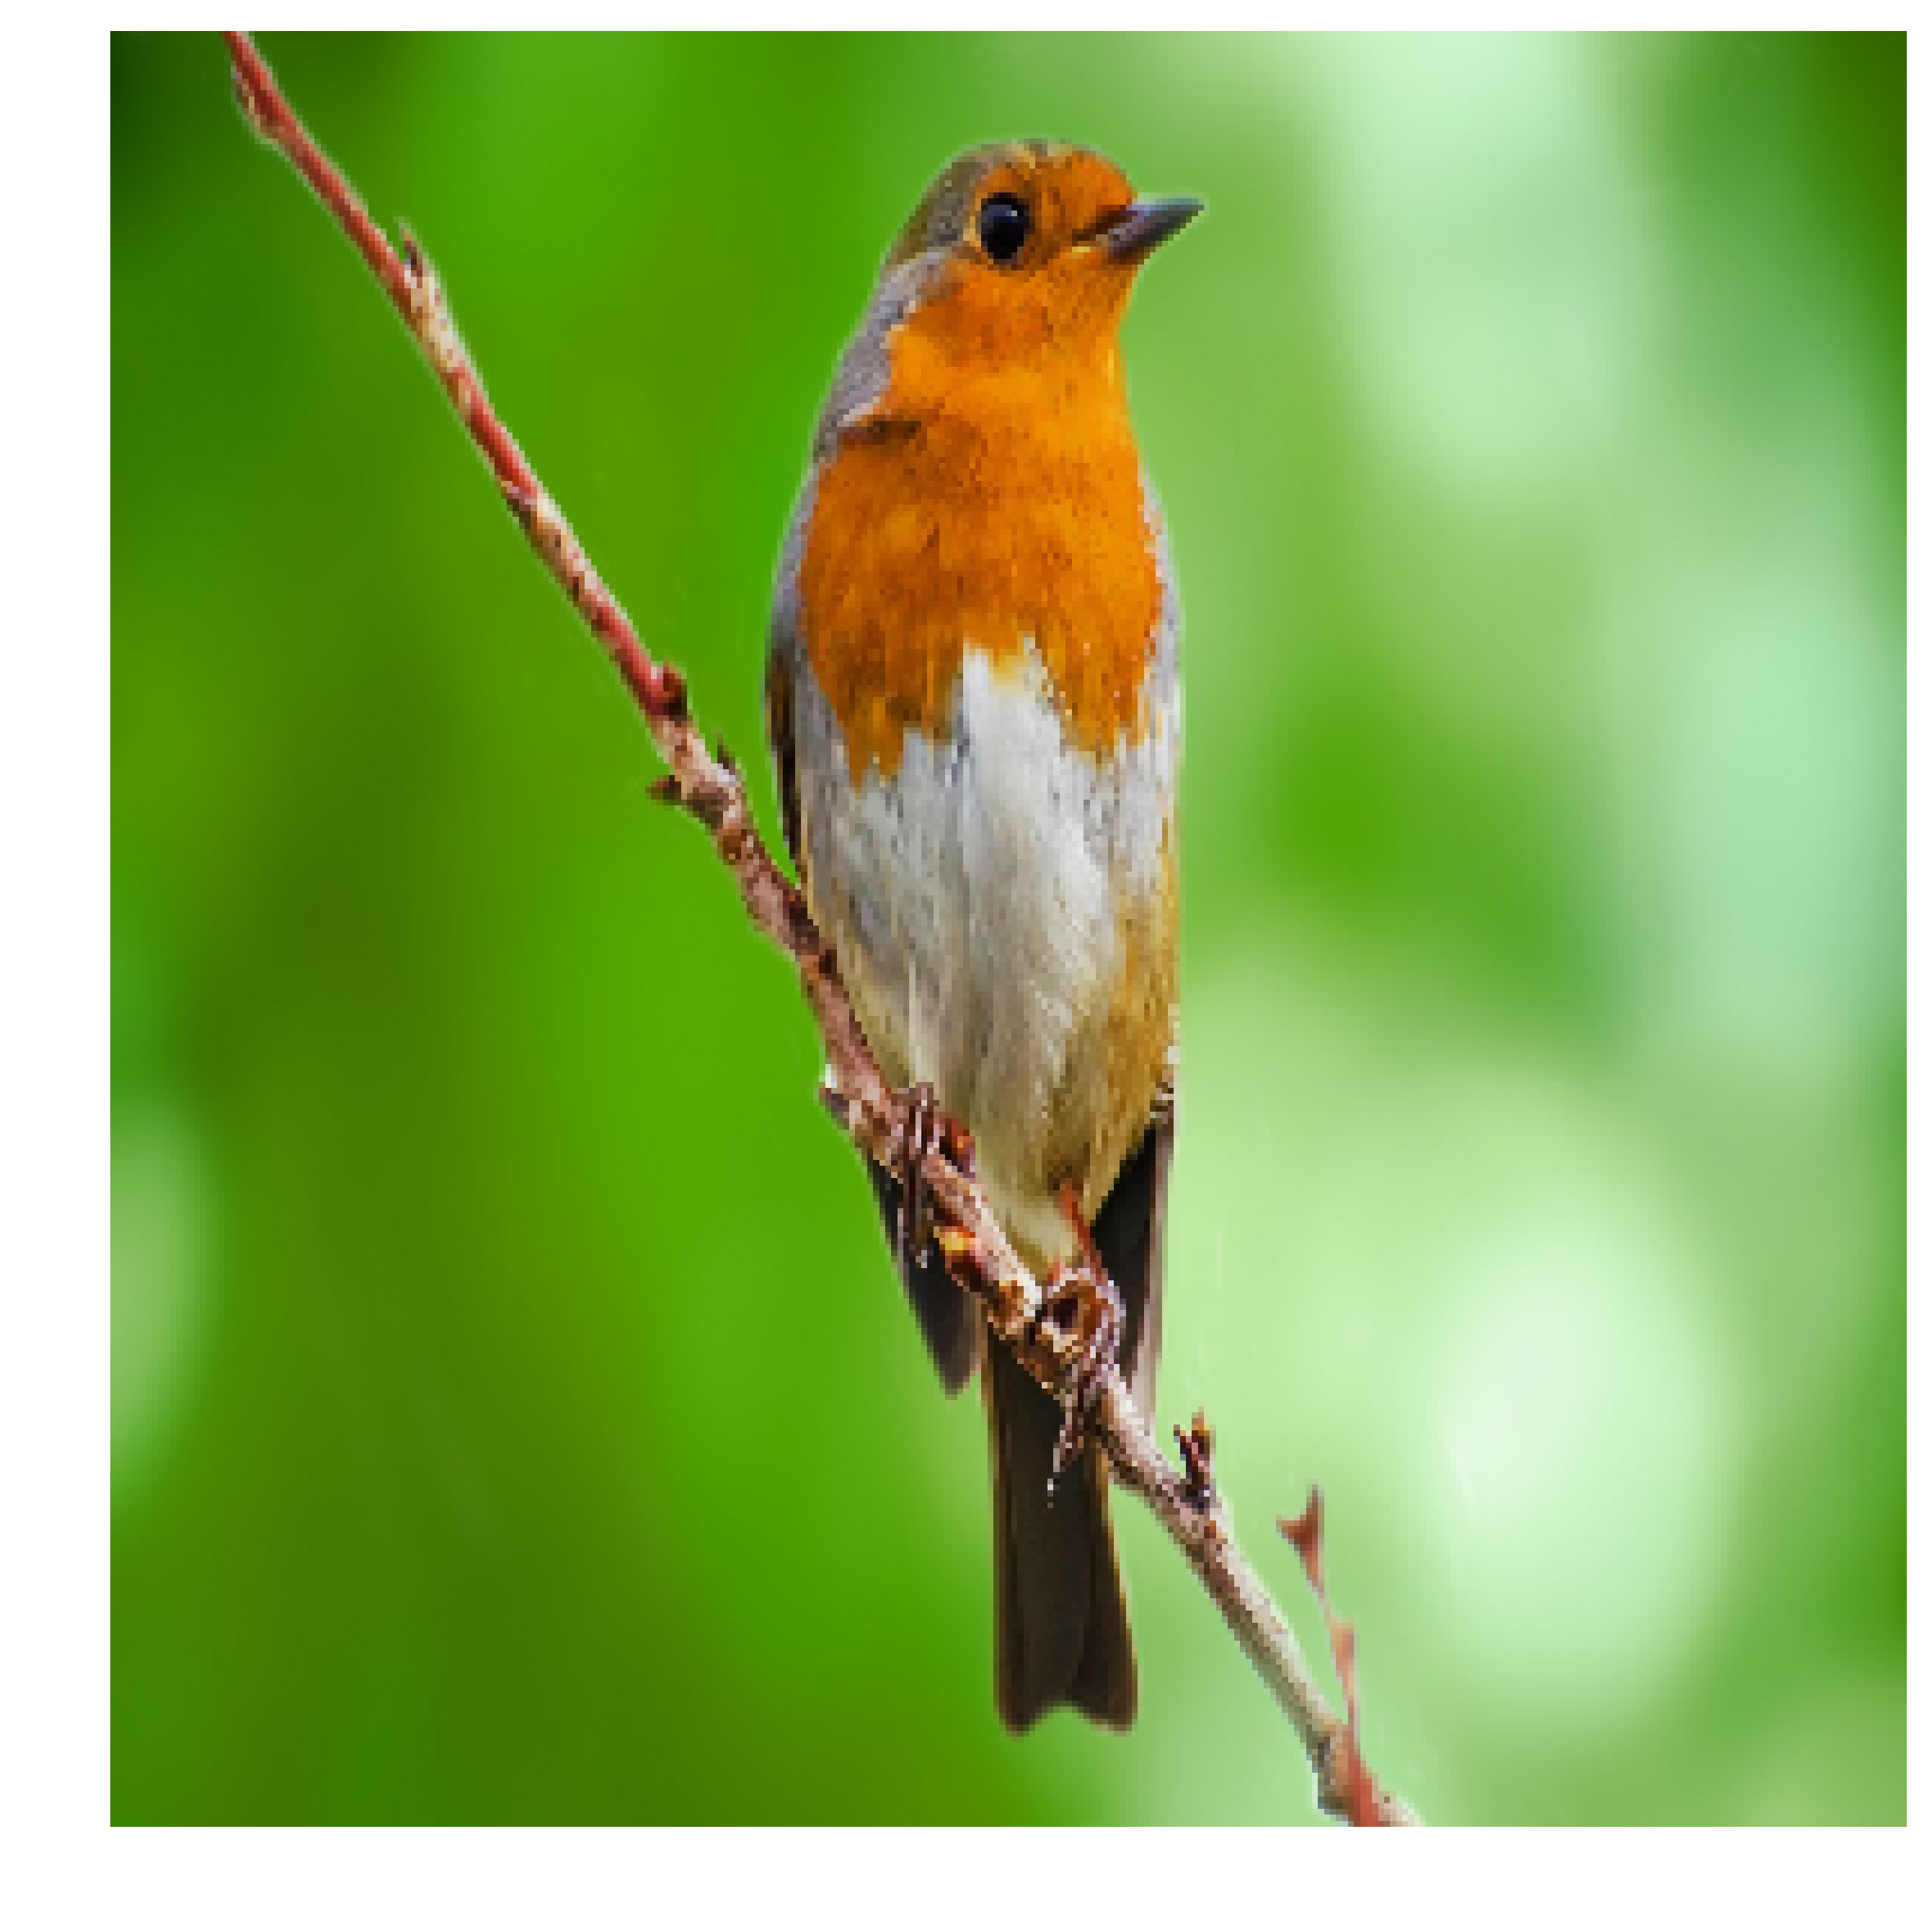

In [2]:
import cv2
import time 


img = cv2.imread('bird1.jpg', -1)
img = cv2.resize(img, (299, 299))

start = time.time() 
yhat = incep_resv2.predict(img.reshape(-1, 299, 299, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()